# Setup

## Siamese Network

In [2]:
import torch
import torch.nn as nn

class SiameseNetwork(nn.Module):

    def __init__(self):
        super(SiameseNetwork, self).__init__()

        # Load pre-trained VGG-19; structure: https://images.app.goo.gl/MtYeQkBbpEtGfvQE8
        self.model = torch.hub.load(
            'pytorch/vision:v0.6.0', 'vgg19', pretrained=True)

        # Remove last two FC layers
        self.model.classifier = self.model.classifier[:-6]
        # print(self.model)

    def forward_once(self, x):
        output = self.model(x)
        return output

    def forward(self, x1, x2):
        output1 = self.forward_once(x1)
        output2 = self.forward_once(x2)
        return output1, output2

## Mount Google Drive

Useful for working with large datasets or as a storage for trained networks



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Upload pictures


In [ ]:
from google.colab import files

print("Upload first picture:")
files.upload()

print("\nUpload second picture:")
files.upload()

Upload first picture:


Saving sunflower0.jpg to sunflower0.jpg

Upload second picture:


Saving sunflower1.jfif to sunflower1.jfif


{'sunflower1.jfif': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\n\x07\x08\x15\x15\x14\x17\x15\x15\x15\x18\x17\x17\x18\x1b\x1b\x1a\x1b\x1b\x1b\x1b\x1b\x1b\x1d\x1a\x1a\x1b\x18\x1b\x1a\x1b\x1a\x1a\x1a\x1b ,$\x1c\x1d) \x1b\x1a&6%).0333\x1b"9>92=,230\x01\x0b\x0b\x0b\x10\x0e\x10\x1e\x12\x12\x1e4*")024442222;224422222222224220222222222;222222222;22\xff\xc0\x00\x11\x08\x01\x03\x00\xc2\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x01\x02\x04\x05\x06\x00\x07\x08\xff\xc4\x00@\x10\x00\x02\x01\x03\x02\x03\x06\x03\x06\x04\x04\x06\x02\x03\x00\x00\x01\x02\x11\x00\x03!\x121\x04AQ\x05\x13"aq\x81\x06\x91\xa12B\xb1\xc1\xd1\xf0\x14R\xe1\xf1\x15#\x82\x92\x073Sbr\xc2\xb3\xd2\x16s\xa2\xff\xc4\x00\x1a\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x01\x04\x05\x00\x06\xff\xc4\x000\x11\x00\x02\x02\x02\x01\x03\x03\x02\x05\x03\x05\x01\x00\x00\x00\x00\x01\x02\x0

## Transforms


In [3]:
import torchvision.transforms as transforms

transformations = transforms.Compose([
             transforms.Resize(size=256),
             transforms.CenterCrop(size=224),
             transforms.ToTensor(),
             transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])              
    ])

## Define make_prediction()

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

def make_prediction(network, path_img0, path_img1):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    cos_similarity = nn.CosineSimilarity()

    img0 = Image.open(path_img0).convert("RGB")
    img1 = Image.open(path_img1).convert("RGB")

    print("First image:")
    plt.imshow(img0)
    plt.show()
    
    print("Second image:")
    plt.imshow(img1)
    plt.show()


    img0_tensor = transformations(img0)
    img1_tensor = transformations(img1)

    img0_tensor = img0_tensor.unsqueeze(0)
    img1_tensor = img1_tensor.unsqueeze(0)

    img0_tensor = img0_tensor.to(device)
    img1_tensor = img1_tensor.to(device)

    with torch.no_grad():
      network.eval()
      output1, output2 = network(img0_tensor, img1_tensor)

      similarity = cos_similarity(output1, output2)

      print(f"Similarity: {similarity.item()}")



# Predict


## Initialize network

In [5]:
net = SiameseNetwork()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# weight_path = "/content/gdrive/MyDrive/Image Similarity/model_lr_0.0006_epoch_6.pth"
# net.load_state_dict(torch.load(weight_path, map_location=device))

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


## Predict


First image:


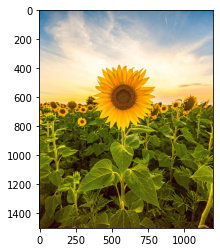

Second image:


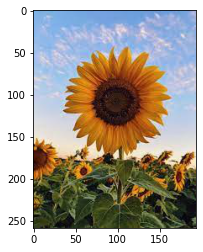

Similarity: 0.8493257761001587


In [6]:
img0_path = "./sunflower0.jpg"
img1_path = "./sunflower1.jfif"

make_prediction(net, img0_path, img1_path)